In [3]:
import matplotlib.pyplot as plt

import Framework.Confounder_Injection as CI
import Framework.Models as Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import torch
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt

# Validation with br_net_simple data

In the br_net_simple dataset the different classes do not overlap but rather have distinct places in the picture. In the br_net case the features (real and confounding) overlap between the classes.

This dataset is probably not representative for real world problems since normally the information in images for different classes does overlap. For example: if we want to classify animals on pictures it is very unlikely that the lion is always on the left side of the picture and the zebra always on the right. Rather both are probably in the middle of the picture most of the time. Therefore the features are overlapping between the classes.

In [4]:
params = [
    [[1, 4], [3, 6]], # real feature
    [[10, 12], [20, 22]] # confounder
    ]

## SimpleConv

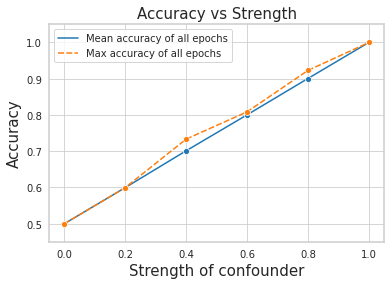

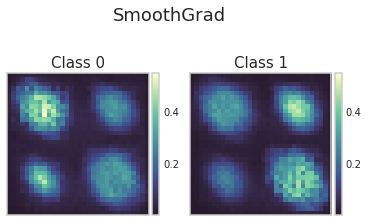

In [5]:
c = CI.confounder(seed=42)
model = Models.SimpleConv()
c.generate_data(mode="br_net_simple", samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=20, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_strength=True, smoothgrad=True)

## Neural Network

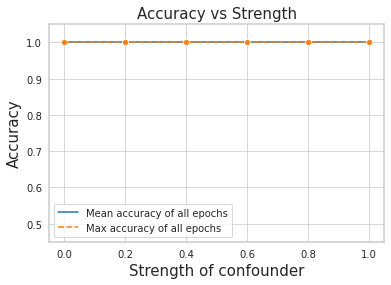

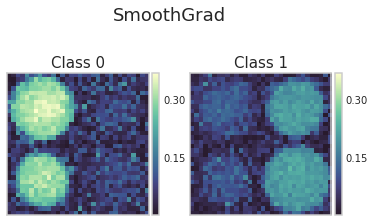

In [7]:
c = CI.confounder(seed=42)
model = Models.NeuralNetwork(32*32)
c.generate_data(mode="br_net_simple", samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=20, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_strength=True, smoothgrad=True)

It seems that the separation leads to the learning of the real feature despite the presence of a confounder in case of the normal NN. Intuitively the network does not need to learn the confounder to achieve higher accuracy because, in contrast to the br_net case, it does not need the additional information. It can be seen in the SmoohGrad image that the network uses both effects (real + confounding) approximately to the same degree. Nevertheless the SimpleConv does learn the confounder, but to a slightler lower degree, compared to the other experiments.